In [1]:
#Created by Chris Chen, Tinh Cao, Shashank Parameswaran, Zainab Hasnain, Sohaib Syed, From IIT
#For debug please contact chriserdou123@gmail.com
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from datetime import datetime

In [2]:
#In target's source field input the location of the data you want to predict
#In df1 to df4's source field input the location of the previous 4 years. If 2022 is target year, then input 2017-2021
#Header, InstDates for respective files
#target1stDate for target year 1st installment due date
#targetYear format for the year of the target dataset

#The location formats and targetYear variable should be close to the ones listed below

target = pd.read_csv('/Users/harrisonchen/Desktop/CCTO Property/2021.rpt',sep='|',header=None,dtype = {1: str, 8: str, 15: str, 40: str, 41: str, 53: str, 54:str},error_bad_lines=False)

df1 = pd.read_csv('/Users/harrisonchen/Desktop/CCTO Property/2017.rpt',sep='|',header=None,dtype = {1: str, 8: str, 15: str, 40: str, 41: str, 53: str, 54:str},error_bad_lines=False)
df2 = pd.read_csv('/Users/harrisonchen/Desktop/CCTO Property/2018.rpt',sep='|',header=None,dtype = {1: str, 8: str, 15: str, 40: str, 41: str, 53: str, 54:str},error_bad_lines=False)
df3 = pd.read_csv('/Users/harrisonchen/Desktop/CCTO Property/2019.rpt',sep='|',header=None,dtype = {1: str, 8: str, 15: str, 40: str, 41: str, 53: str, 54:str},error_bad_lines=False)
df4 = pd.read_csv('/Users/harrisonchen/Desktop/CCTO Property/2020.rpt',sep='|',header=None,dtype = {1: str, 8: str, 15: str, 40: str, 41: str, 53: str, 54:str},error_bad_lines=False)

header = pd.read_csv('/Users/harrisonchen/Desktop/CCTO Property/Header.rpt', sep='|', header=None)
instDates = pd.read_csv("/Users/harrisonchen/Desktop/CCTO Property/InstDates.csv")

targetYear = 2021

/usr/local/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2714: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
Skipping line 1528882: expected 81 fields, saw 83

/usr/local/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2714: DtypeWarning: Columns (9,21,25,31,44,67) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
head = header.iloc[0].to_list()
df1 = df1.dropna()
df2 = df2.dropna()
df3 = df3.dropna()
df4 = df4.dropna()
target = target.dropna()

df1.columns = head
df2.columns = head
df3.columns = head
df4.columns = head
target.columns = head

In [4]:
df1 = df1[['PIN','TaxStatus','HomeownerExempt', 'SeniorExempt','SeniorFreezeExempt', 'LongtimeHomeownersExempt',
            'TaxType', 'BillYear', 'BillType','AdjustedAmountDue1','TaxAmountDue1','InterestAmountDue1','CostAmountDue1',
            'TotalAmountDue1','LastPaymentDate1','LastPaymentSource1','OriginalTaxDue2','AdjustedTaxDue2','TaxAmountDue2',
            'InterestAmountDue2','CostAmountDue2','TotalAmountDue2','LastPaymentDate2','LastPaymentSource2','CofENumber',
            'PastTaxSaleStatus','EqualizedEvaluation','AssessedValuation','TaxRate','CondemnationStatus', 'MunicipalAcquisitionStatus',
            'AcquisitionStatus', 'ExemptStatus', 'BankruptStatus','RefundStatus', 'LastPaymentReceivedAmount1',
            'LastPaymentReceivedAmount2','HomeownerExemptAmount', 'SeniorExemptAmount','SeniorFreezeExemptAmount', 'LongtimeHomeownersExemptAmount',
            'VeteranExempt','TaxDueEstimated1']]
df2 = df2[['PIN','TaxStatus','HomeownerExempt', 'SeniorExempt','SeniorFreezeExempt', 'LongtimeHomeownersExempt',
            'TaxType', 'BillYear', 'BillType','AdjustedAmountDue1','TaxAmountDue1','InterestAmountDue1','CostAmountDue1',
            'TotalAmountDue1','LastPaymentDate1','LastPaymentSource1','OriginalTaxDue2','AdjustedTaxDue2','TaxAmountDue2',
            'InterestAmountDue2','CostAmountDue2','TotalAmountDue2','LastPaymentDate2','LastPaymentSource2','CofENumber',
            'PastTaxSaleStatus','EqualizedEvaluation','AssessedValuation','TaxRate','CondemnationStatus', 'MunicipalAcquisitionStatus',
            'AcquisitionStatus', 'ExemptStatus', 'BankruptStatus','RefundStatus', 'LastPaymentReceivedAmount1',
            'LastPaymentReceivedAmount2','HomeownerExemptAmount', 'SeniorExemptAmount','SeniorFreezeExemptAmount', 'LongtimeHomeownersExemptAmount',
            'VeteranExempt','TaxDueEstimated1']]
df3 = df3[['PIN','TaxStatus','HomeownerExempt', 'SeniorExempt','SeniorFreezeExempt', 'LongtimeHomeownersExempt',
            'TaxType', 'BillYear', 'BillType','AdjustedAmountDue1','TaxAmountDue1','InterestAmountDue1','CostAmountDue1',
            'TotalAmountDue1','LastPaymentDate1','LastPaymentSource1','OriginalTaxDue2','AdjustedTaxDue2','TaxAmountDue2',
            'InterestAmountDue2','CostAmountDue2','TotalAmountDue2','LastPaymentDate2','LastPaymentSource2','CofENumber',
            'PastTaxSaleStatus','EqualizedEvaluation','AssessedValuation','TaxRate','CondemnationStatus', 'MunicipalAcquisitionStatus',
            'AcquisitionStatus', 'ExemptStatus', 'BankruptStatus','RefundStatus', 'LastPaymentReceivedAmount1',
            'LastPaymentReceivedAmount2','HomeownerExemptAmount', 'SeniorExemptAmount','SeniorFreezeExemptAmount', 'LongtimeHomeownersExemptAmount',
            'VeteranExempt','TaxDueEstimated1']]
df4 = df4[['PIN','TaxStatus','HomeownerExempt', 'SeniorExempt','SeniorFreezeExempt', 'LongtimeHomeownersExempt',
            'TaxType', 'BillYear', 'BillType','AdjustedAmountDue1','TaxAmountDue1','InterestAmountDue1','CostAmountDue1',
            'TotalAmountDue1','LastPaymentDate1','LastPaymentSource1','OriginalTaxDue2','AdjustedTaxDue2','TaxAmountDue2',
            'InterestAmountDue2','CostAmountDue2','TotalAmountDue2','LastPaymentDate2','LastPaymentSource2','CofENumber',
            'PastTaxSaleStatus','EqualizedEvaluation','AssessedValuation','TaxRate','CondemnationStatus', 'MunicipalAcquisitionStatus',
            'AcquisitionStatus', 'ExemptStatus', 'BankruptStatus','RefundStatus', 'LastPaymentReceivedAmount1',
            'LastPaymentReceivedAmount2','HomeownerExemptAmount', 'SeniorExemptAmount','SeniorFreezeExemptAmount', 'LongtimeHomeownersExemptAmount',
            'VeteranExempt','TaxDueEstimated1']]
target = target[['PIN','TaxStatus','HomeownerExempt', 'SeniorExempt','SeniorFreezeExempt', 'LongtimeHomeownersExempt',
            'TaxType', 'BillYear', 'BillType','AdjustedAmountDue1','TaxAmountDue1','InterestAmountDue1','CostAmountDue1',
            'TotalAmountDue1','LastPaymentDate1','LastPaymentSource1','OriginalTaxDue2','AdjustedTaxDue2','TaxAmountDue2',
            'InterestAmountDue2','CostAmountDue2','TotalAmountDue2','LastPaymentDate2','LastPaymentSource2','CofENumber',
            'PastTaxSaleStatus','EqualizedEvaluation','AssessedValuation','TaxRate','CondemnationStatus', 'MunicipalAcquisitionStatus',
            'AcquisitionStatus', 'ExemptStatus', 'BankruptStatus','RefundStatus', 'LastPaymentReceivedAmount1',
            'LastPaymentReceivedAmount2','HomeownerExemptAmount', 'SeniorExemptAmount','SeniorFreezeExemptAmount', 'LongtimeHomeownersExemptAmount',
            'VeteranExempt','TaxDueEstimated1']]

tail1 = instDates.tail(1)['Year'].values[0] - targetYear + 5
dates = instDates.tail(tail1)
df1['PmtDue1'] = dates['Inst1'].iloc[0]
df2['PmtDue1'] = dates['Inst1'].iloc[1]
df3['PmtDue1'] = dates['Inst1'].iloc[2]
df4['PmtDue1'] = dates['Inst1'].iloc[3]
df1['PmtDue2'] = dates['Inst2'].iloc[0]
df2['PmtDue2'] = dates['Inst2'].iloc[1]
df3['PmtDue2'] = dates['Inst2'].iloc[2]
df4['PmtDue2'] = dates['Inst2'].iloc[3]
target['PmtDue1'] = dates['Inst1'].iloc[4]

y5 = pd.concat([df1,df2,df3,df4])
len(y5)


7461906

In [5]:
y5['Location']= y5['PIN'].str[0:2]
target['Location']= target['PIN'].str[0:2]
y5 = y5[y5['TaxStatus']!=1]
target = target[target['TaxStatus']!=1]
len(y5)

7095242

In [6]:
y5 = y5[(y5['AdjustedAmountDue1']!=0) | (y5['AdjustedTaxDue2']!=0)]
target = target[(target['AdjustedAmountDue1']!=0) | (target['AdjustedTaxDue2']!=0)]
len(y5)

6914851

In [7]:
df1=1
df2=1
df3=1
df4=1

y5 = y5[(y5['LastPaymentSource2'] != '600') &(y5['LastPaymentSource2'] != '527') & (y5['LastPaymentSource2'] != '800') &
       (y5['LastPaymentSource2'] != '802') & (y5['LastPaymentSource2'] != '830')]
target = target[(target['LastPaymentSource2'] != '600') &(target['LastPaymentSource2'] != '527') & (target['LastPaymentSource2'] != '800') &
       (target['LastPaymentSource2'] != '802') & (target['LastPaymentSource2'] != '830')]
len(y5)

3846223

In [8]:
y5 = y5[(y5['LastPaymentSource1'] != '600') &(y5['LastPaymentSource1'] != '527') & (y5['LastPaymentSource1'] != '800') &
       (y5['LastPaymentSource1'] != '802') & (y5['LastPaymentSource1'] != '830')]
target = target[(target['LastPaymentSource1'] != '600') &(target['LastPaymentSource1'] != '527') & (target['LastPaymentSource1'] != '800') &
       (target['LastPaymentSource1'] != '802') & (target['LastPaymentSource1'] != '830')]
len(y5)

3701926

In [9]:

y5 = y5[y5['LastPaymentDate1']!='00000000']
y5 = y5[y5['LastPaymentDate2']!='00000000']
target = target[target['LastPaymentDate1']!='00000000']


y5['LastPaymentDate1'] = pd.to_datetime(y5['LastPaymentDate1'], format='%m%d%Y')
y5['LastPaymentDate2'] = pd.to_datetime(y5['LastPaymentDate2'], format='%m%d%Y')
target['LastPaymentDate1'] = pd.to_datetime(target['LastPaymentDate1'], format='%m%d%Y')


y5['PmtDue1'] = pd.to_datetime(y5['PmtDue1'], format='%Y-%m-%d')
y5['PmtDue2'] = pd.to_datetime(y5['PmtDue2'], format='%Y-%m-%d')
target['PmtDue1'] = pd.to_datetime(target['PmtDue1'], format='%Y-%m-%d')


y5['DiffPmt1'] = (y5['LastPaymentDate1'] - y5['PmtDue1']).dt.days
y5['DiffPmt2'] = (y5['LastPaymentDate2'] - y5['PmtDue2']).dt.days
target['DiffPmt1'] = (target['LastPaymentDate1'] - target['PmtDue1']).dt.days


In [10]:
y5['BillType'] = y5['BillType'].astype(str)
y5['CofENumber'] = y5['CofENumber'].astype(str)
target['BillType'] = target['BillType'].astype(str)
target['CofENumber'] = target['CofENumber'].astype(str)

y5 = y5.drop('SeniorFreezeExempt',axis=1)
target = target.drop('SeniorFreezeExempt',axis=1)

y5['AdjustedAmountDue1'] = y5['AdjustedAmountDue1'].astype(float)
y5['AdjustedTaxDue2'] = y5['AdjustedTaxDue2'].astype(float)
y5['PastTaxSaleStatus'] = y5['PastTaxSaleStatus'].map({'Y': 1, 'N': 0})
y5['LastPaymentReceivedAmount1'] = y5['LastPaymentReceivedAmount1'].astype(float)
target['AdjustedAmountDue1'] = target['AdjustedAmountDue1'].astype(float)
target['AdjustedTaxDue2'] = target['AdjustedTaxDue2'].astype(float)
target['PastTaxSaleStatus'] = target['PastTaxSaleStatus'].map({'Y': 1, 'N': 0})
target['LastPaymentReceivedAmount1'] = target['LastPaymentReceivedAmount1'].astype(float)

y5["CofENumber"] = y5['CofENumber'].astype(float)
y5.loc[y5["CofENumber"] == 0, "CofENumber"] = 0
y5.loc[y5["CofENumber"] != 0, "CofENumber"] = 1
y5["CofENumber"] = y5['CofENumber'].astype(int)
target["CofENumber"] = target['CofENumber'].astype(float)
target.loc[target["CofENumber"] == 0, "CofENumber"] = 0
target.loc[target["CofENumber"] != 0, "CofENumber"] = 1
target["CofENumber"] = target['CofENumber'].astype(int)

y5.loc[y5["HomeownerExempt"] > 0, "HomeownerExempt"] = 1
y5.loc[y5["SeniorExempt"] > 0, "SeniorExempt"] = 1
y5.loc[y5["LongtimeHomeownersExempt"] > 0, "LongtimeHomeownersExempt"] = 1
y5 = y5.drop(['LastPaymentDate1','LastPaymentDate2','PmtDue1','PmtDue2'],axis=1)
y5.loc[y5["ExemptStatus"] > 0, "ExemptStatus"] = 1
y5.loc[y5["VeteranExempt"] > 0, "VeteranExempt"] = 1
target.loc[target["HomeownerExempt"] > 0, "HomeownerExempt"] = 1
target.loc[target["SeniorExempt"] > 0, "SeniorExempt"] = 1
target.loc[target["LongtimeHomeownersExempt"] > 0, "LongtimeHomeownersExempt"] = 1
target = target.drop(['LastPaymentDate1','LastPaymentDate2','PmtDue1'],axis=1)
target.loc[target["ExemptStatus"] > 0, "ExemptStatus"] = 1
target.loc[target["VeteranExempt"] > 0, "VeteranExempt"] = 1

y5 = y5.drop(['EqualizedEvaluation','TaxAmountDue1','TaxAmountDue2','OriginalTaxDue2'],axis=1)
y5 = y5.astype({"SeniorExempt":'int',"LongtimeHomeownersExempt":'int',"BillYear":'int',"CondemnationStatus":'int',
               "MunicipalAcquisitionStatus":'int',"AcquisitionStatus":'int',"ExemptStatus":'int',"BankruptStatus":'int',
               "VeteranExempt":'int'}) 
target = target.drop(['EqualizedEvaluation','TaxAmountDue1','TaxAmountDue2','OriginalTaxDue2'],axis=1)
target = target.astype({"SeniorExempt":'int',"LongtimeHomeownersExempt":'int',"BillYear":'int',"CondemnationStatus":'int',
               "MunicipalAcquisitionStatus":'int',"AcquisitionStatus":'int',"ExemptStatus":'int',"BankruptStatus":'int',
               "VeteranExempt":'int'}) 

In [11]:
yr5 = y5[y5['DiffPmt2'] > 0]
yr5 = yr5[yr5['DiffPmt2'] < 500]
len(yr5)

674477

In [12]:
yr5 = yr5[yr5['DiffPmt1'] > 0]
yr5 = yr5[yr5['DiffPmt1'] < 680]
target = target[target['DiffPmt1'] > 0]
target = target[target['DiffPmt1'] < 680]
len(yr5)

366836

In [13]:
yr5 = yr5.drop(['LastPaymentSource2','LastPaymentReceivedAmount2'], axis=1)
yr5 = yr5.drop('PIN',axis=1)
target = target.drop(['LastPaymentSource2','LastPaymentReceivedAmount2'], axis=1)
target1 = target.drop('PIN', axis=1)
yr5.columns.values

array(['TaxStatus', 'HomeownerExempt', 'SeniorExempt',
       'LongtimeHomeownersExempt', 'TaxType', 'BillYear', 'BillType',
       'AdjustedAmountDue1', 'InterestAmountDue1', 'CostAmountDue1',
       'TotalAmountDue1', 'LastPaymentSource1', 'AdjustedTaxDue2',
       'InterestAmountDue2', 'CostAmountDue2', 'TotalAmountDue2',
       'CofENumber', 'PastTaxSaleStatus', 'AssessedValuation', 'TaxRate',
       'CondemnationStatus', 'MunicipalAcquisitionStatus',
       'AcquisitionStatus', 'ExemptStatus', 'BankruptStatus',
       'RefundStatus', 'LastPaymentReceivedAmount1',
       'HomeownerExemptAmount', 'SeniorExemptAmount',
       'SeniorFreezeExemptAmount', 'LongtimeHomeownersExemptAmount',
       'VeteranExempt', 'TaxDueEstimated1', 'Location', 'DiffPmt1',
       'DiffPmt2'], dtype=object)

In [14]:
yr5['BillYear'] = yr5['BillYear']-2017
yr5.loc[yr5["BillYear"] < 0, "BillYear"] = 0

target1['BillYear'] = target1['BillYear']-2017
target1.loc[target1["BillYear"] < 0, "BillYear"] = 0

print(yr5.shape)
print(target1.shape)

(366836, 36)
(157765, 35)


In [15]:
yr5['LateLabel'] = 1
yr5.loc[yr5["DiffPmt2"] > 18, "LateLabel"] = 2
yr5.loc[yr5["DiffPmt2"] > 36, "LateLabel"] = 3
yr5.loc[yr5["DiffPmt2"] > 72, "LateLabel"] = 4
yr5.loc[yr5["DiffPmt2"] > 108, "LateLabel"] = 5
yr5.loc[yr5["DiffPmt2"] > 144, "LateLabel"] = 6
yr5.loc[yr5["DiffPmt2"] > 180, "LateLabel"] = 7
yr5.loc[yr5["DiffPmt2"] > 216, "LateLabel"] = 8
yr5.loc[yr5["DiffPmt2"] > 252, "LateLabel"] = 9
yr5.loc[yr5["DiffPmt2"] > 288, "LateLabel"] = 10

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(yr5.drop(['DiffPmt2','LateLabel'],axis=1), yr5['LateLabel'],
                                                    test_size=0.2, random_state=42,stratify=yr5['LateLabel'])

In [17]:
from sklearn.ensemble import RandomForestClassifier

st = time.time()
rfc = RandomForestClassifier(max_depth=26,n_estimators=700, criterion='entropy')
rfc.fit(X_train,y_train)
print(rfc)
print('train data accuracy: ', rfc.score(X_train,y_train))
print('test data accuracy: ', rfc.score(X_test,y_test))
et = time.time()
print('Execution time in Min: ', (et-st)/60)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=26, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=700, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
('train data accuracy: ', 0.9112475636185206)
('test data accuracy: ', 0.5688583578671901)
('Execution time in Min: ', 16.950168999036155)


Text(0.5,0,'Random Forest Feature Importance')

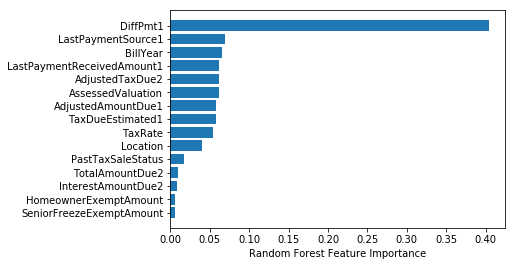

In [18]:
sorted_idx = rfc.feature_importances_.argsort()
imp = pd.DataFrame()
imp['col'] = yr5.drop(['DiffPmt2','LateLabel'],axis=1).columns[sorted_idx]
imp['imp'] = rfc.feature_importances_[sorted_idx]
imp = imp.sort_values('imp',ascending=False)
finalimp = imp.head(15).sort_values('imp',ascending=True)
plt.barh(finalimp['col'],finalimp['imp'])
plt.xlabel("Random Forest Feature Importance")

In [19]:
pred = rfc.predict(X_test)

In [20]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,pred)
df = pd.DataFrame(cm,
                 index = ['  1','  2','  3','  4','  5','  6','  7','  8','  9','  10'],
                 columns = ['1','2','3','4','5','6','7','8','9','10'])

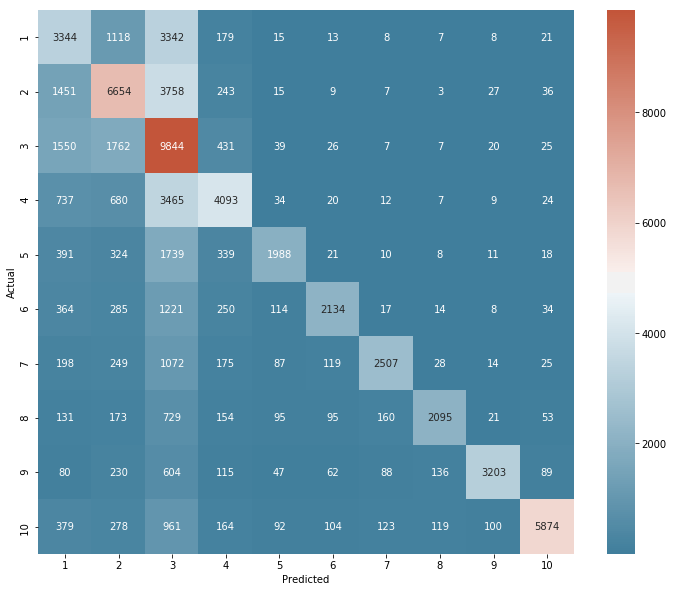

In [21]:
plt.figure(figsize=(12,10))
sns.heatmap(df,annot=True,fmt='g',cmap = sns.diverging_palette(230, 20, as_cmap=True))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [22]:
row = df.div(df.sum(axis=1), axis=0)
row = row.to_string(formatters={
    '1': '{:,.2%}'.format,
    '2': '{:,.2%}'.format,
    '3': '{:,.2%}'.format,
    '4': '{:,.2%}'.format,
    '5': '{:,.2%}'.format,
    '6': '{:,.2%}'.format,
    '7': '{:,.2%}'.format,
    '8': '{:,.2%}'.format,
    '9': '{:,.2%}'.format,
    '10': '{:,.2%}'.format
})
print("Recall Values                Predicted")
print(row)

Recall Values                Predicted
          1      2      3      4      5      6      7      8      9     10
  1  41.51% 13.88% 41.49%  2.22%  0.19%  0.16%  0.10%  0.09%  0.10%  0.26%
  2  11.89% 54.53% 30.80%  1.99%  0.12%  0.07%  0.06%  0.02%  0.22%  0.30%
  3  11.30% 12.85% 71.80%  3.14%  0.28%  0.19%  0.05%  0.05%  0.15%  0.18%
  4   8.12%  7.49% 38.16% 45.07%  0.37%  0.22%  0.13%  0.08%  0.10%  0.26%
  5   8.06%  6.68% 35.86%  6.99% 41.00%  0.43%  0.21%  0.16%  0.23%  0.37%
  6   8.20%  6.42% 27.49%  5.63%  2.57% 48.05%  0.38%  0.32%  0.18%  0.77%
  7   4.43%  5.57% 23.96%  3.91%  1.94%  2.66% 56.03%  0.63%  0.31%  0.56%
  8   3.53%  4.67% 19.67%  4.16%  2.56%  2.56%  4.32% 56.53%  0.57%  1.43%
  9   1.72%  4.94% 12.98%  2.47%  1.01%  1.33%  1.89%  2.92% 68.82%  1.91%
  10  4.63%  3.39% 11.73%  2.00%  1.12%  1.27%  1.50%  1.45%  1.22% 71.69%


In [23]:
column = df.div(df.sum(axis=0), axis=1)
column = column.to_string(formatters={
    '1': '{:,.2%}'.format,
    '2': '{:,.2%}'.format,
    '3': '{:,.2%}'.format,
    '4': '{:,.2%}'.format,
    '5': '{:,.2%}'.format,
    '6': '{:,.2%}'.format,
    '7': '{:,.2%}'.format,
    '8': '{:,.2%}'.format,
    '9': '{:,.2%}'.format,
    '10': '{:,.2%}'.format
})
print("Precision Values              Predicted")
print(column)

Precision Values              Predicted
          1      2      3      4      5      6      7      8      9     10
  1  38.77%  9.51% 12.50%  2.91%  0.59%  0.50%  0.27%  0.29%  0.23%  0.34%
  2  16.82% 56.62% 14.06%  3.96%  0.59%  0.35%  0.24%  0.12%  0.79%  0.58%
  3  17.97% 14.99% 36.82%  7.02%  1.54%  1.00%  0.24%  0.29%  0.58%  0.40%
  4   8.54%  5.79% 12.96% 66.63%  1.35%  0.77%  0.41%  0.29%  0.26%  0.39%
  5   4.53%  2.76%  6.50%  5.52% 78.70%  0.81%  0.34%  0.33%  0.32%  0.29%
  6   4.22%  2.42%  4.57%  4.07%  4.51% 81.98%  0.58%  0.58%  0.23%  0.55%
  7   2.30%  2.12%  4.01%  2.85%  3.44%  4.57% 85.30%  1.16%  0.41%  0.40%
  8   1.52%  1.47%  2.73%  2.51%  3.76%  3.65%  5.44% 86.43%  0.61%  0.85%
  9   0.93%  1.96%  2.26%  1.87%  1.86%  2.38%  2.99%  5.61% 93.63%  1.44%
  10  4.39%  2.37%  3.59%  2.67%  3.64%  4.00%  4.19%  4.91%  2.92% 94.76%


In [24]:
target['PredictionClassLabel'] = rfc.predict(target1)
target['PredictionResult'] = '1 - 18 days late'
target.loc[target["PredictionClassLabel"] == 2, "PredictionResult"] = '19 - 36 days late'
target.loc[target["PredictionClassLabel"] == 3, "PredictionResult"] = '37 - 72 days late'
target.loc[target["PredictionClassLabel"] == 4, "PredictionResult"] = '73 - 108 days late'
target.loc[target["PredictionClassLabel"] == 5, "PredictionResult"] = '109 - 144 days late'
target.loc[target["PredictionClassLabel"] == 6, "PredictionResult"] = '145 - 180 days late'
target.loc[target["PredictionClassLabel"] == 7, "PredictionResult"] = '181 - 216 days late'
target.loc[target["PredictionClassLabel"] == 8, "PredictionResult"] = '217 - 252 days late'
target.loc[target["PredictionClassLabel"] == 9, "PredictionResult"] = '253 - 288 days late'
target.loc[target["PredictionClassLabel"] == 10, "PredictionResult"] = 'More than 288 days late'


In [25]:
result = target[['PIN','PredictionClassLabel','PredictionResult']]
result.reset_index(inplace=True)
result.drop("index",axis=1,inplace=True)
result

/usr/local/lib/python2.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,PIN,PredictionClassLabel,PredictionResult
0,08321010301031,10,More than 288 days late
1,08321010301037,2,19 - 36 days late
2,08321010301064,1,1 - 18 days late
3,08321010331015,4,73 - 108 days late
4,08321010331018,1,1 - 18 days late
5,08321010331050,3,37 - 72 days late
6,07151000371070,1,1 - 18 days late
7,08321010351001,1,1 - 18 days late
8,08321010351016,3,37 - 72 days late
9,08321010301024,1,1 - 18 days late


In [26]:
"""#to locate a specific PIN:
result[result['PIN']=='Enter Pin Number Here']"""

"#to locate a specific PIN:\nresult[result['PIN']=='Enter Pin Number Here']"

In [27]:
"""#to load the final result with selected columns:
colList = ['PIN', 'PredictionClassLabel', 'PredictionResult', 'Enter Column Name', 'Enter Column Name']
result1 = target[colList]
result1.reset_index(inplace=True)
result1.drop("index",axis=1,inplace=True)
result1"""

'#to load the final result with selected columns:\ncolList = [\'PIN\', \'PredictionClassLabel\', \'PredictionResult\', \'Enter Column Name\', \'Enter Column Name\']\nresult1 = target[colList]\nresult1.reset_index(inplace=True)\nresult1.drop("index",axis=1,inplace=True)\nresult1'

In [28]:
"""#to export a dataframe named result1 into a csv file 
result1.to_csv('file_name.csv', sep = '|'')"""

"#to export a dataframe named result1 into a csv file \nresult1.to_csv('file_name.csv', sep = '|'')"